In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
dataset = pd.read_csv("/content/car_data_2.csv")
dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,17.0
...,...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,27.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,44.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,32.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,28.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     406 non-null    float64
 1   displacement  406 non-null    float64
 2   horsepower    400 non-null    float64
 3   weight        406 non-null    float64
 4   acceleration  406 non-null    float64
 5   model_year    406 non-null    float64
 6   origin        406 non-null    float64
 7   mpg           398 non-null    float64
dtypes: float64(8)
memory usage: 25.5 KB


In [7]:
dataset=dataset.dropna(axis=0)

In [8]:
dataset.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


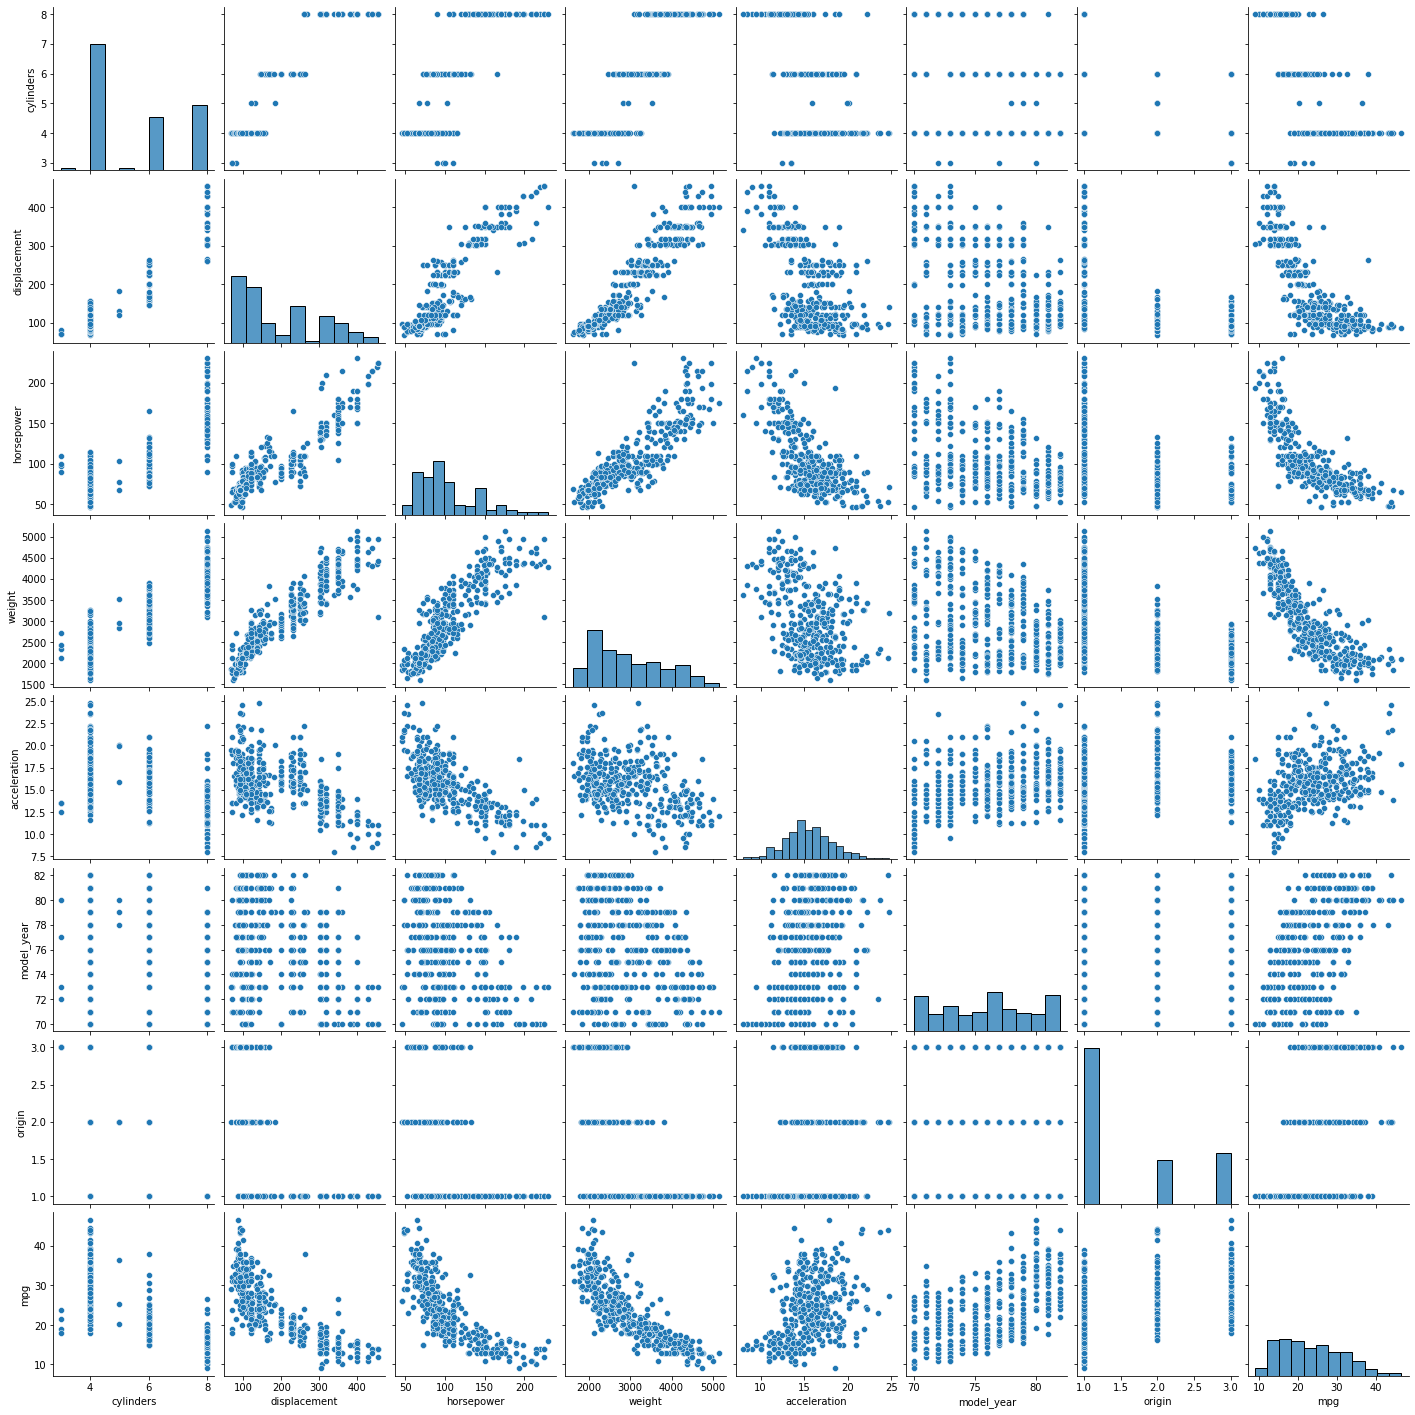

In [ ]:
sns.pairplot(dataset)

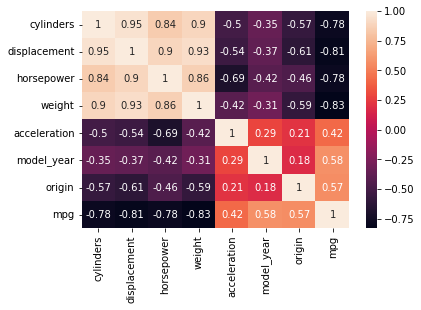

In [9]:
corr = sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Ecuacion normal

In [46]:
x = dataset.iloc[:,0:4].to_numpy()
bias = np.ones((x.shape[0],1))

x_b = np.append(bias, x, axis=1)

y = dataset.iloc[:,-1].to_numpy().reshape(-1,1)

x_n = normalize(x_b, norm='max', axis=0)
y_n = normalize(y, norm='max', axis=0)

In [47]:
(x_train, x_test, y_train, y_test) = train_test_split(x_n, y_n, test_size=0.3, random_state=5)

In [48]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x_train),x_train)),np.transpose(x_train)), y_train)
print(theta)

[[ 0.96638397]
 [-0.0985135 ]
 [ 0.06090414]
 [-0.24438291]
 [-0.55190604]]


In [49]:
print("theta0 = ",theta[0])
print("theta1 = ",theta[1])
print("theta2 = ",theta[2])
print("theta3 = ",theta[3])
print("theta4 = ",theta[4])

theta0 =  [0.96638397]
theta1 =  [-0.0985135]
theta2 =  [0.06090414]
theta3 =  [-0.24438291]
theta4 =  [-0.55190604]


In [50]:
x_train.shape

(274, 5)

In [51]:
theta.shape

(5, 1)

In [52]:
y_pred = np.dot(x_train, theta)

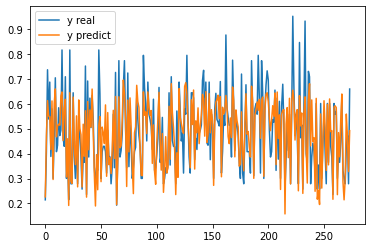

In [28]:
plt.plot(y_train, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()

In [29]:
y_pred = np.dot(x_test, theta)

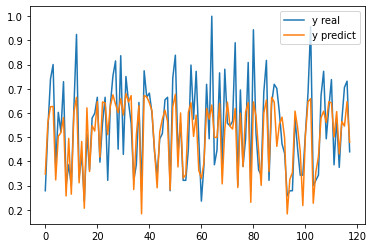

In [30]:
plt.plot(y_test, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()

# Regresión lineal con SkLearn (lasso)

In [39]:
x_l1 = normalize(x, norm='l1', axis=0)
y_l1 = normalize(y, norm='l1', axis=0)

(x_train, x_test, y_train, y_test) = train_test_split(x_l1, y_l1, test_size=0.3, random_state=5)

In [43]:
model = 0
model = LinearRegression()
model = model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[-0.13392624  0.05172221 -0.22062296 -0.63545492]]
[0.00489984]


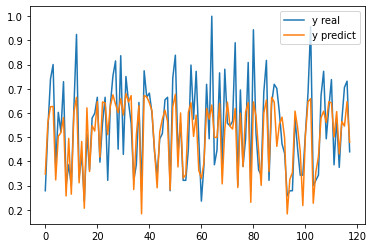

In [34]:
y_pred = model.predict(x_test)
plt.plot(y_test, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()

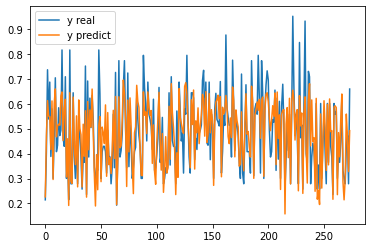

In [35]:
y_pred = model.predict(x_train)
plt.plot(y_train, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()

In [36]:
mse(y_train,y_pred)

0.0066608537742893475

# Regresión lineal con SkLearn (Ridge)

In [53]:
x_l2 = normalize(x, norm='l2', axis=0)
y_l2 = normalize(y, norm='l2', axis=0)

(x_train, x_test, y_train, y_test) = train_test_split(x_l2, y_l2, test_size=0.3, random_state=5)

In [54]:
model = LinearRegression()
model = model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[-0.13310328  0.05572301 -0.22307959 -0.62699668]]
[0.09205748]


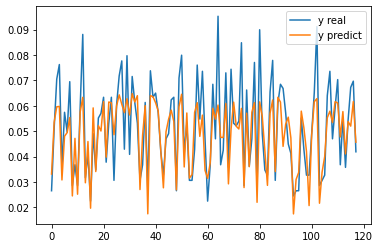

In [55]:
y_pred = model.predict(x_test)
plt.plot(y_test, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()

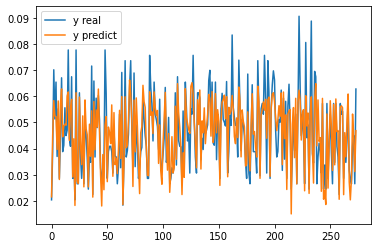

In [56]:
y_pred = model.predict(x_train)
plt.plot(y_train, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()

# Gradiente descendente

In [57]:
(x_train, x_test, y_train, y_test) = train_test_split(x_n, y_n, test_size=0.3, random_state=5)

In [59]:
x.shape

(392, 4)

In [72]:
steps = 2000
learning_rate = 0.01

theta = np.random.random((x.shape[1]+1,1))  #Inicializacion aleatoria de los parametros

# ---- Descenso del gradiente ----#
for step in range(0,steps):
  gradient = (2/x_train.shape[0])*(np.dot(np.transpose(x_train),(np.dot(x_train,theta)-y_train)))
  theta -= learning_rate*gradient

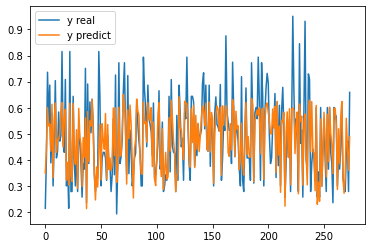

In [73]:
y_pred = np.dot(x_train, theta)
ax = plt.plot(y_train, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()

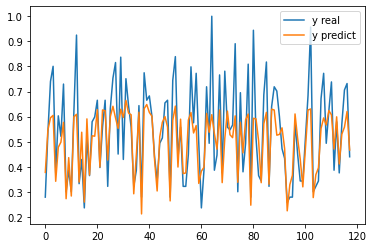

In [74]:
y_pred = np.dot(x_test, theta)
plt.plot(y_test, label='y real')
plt.plot(y_pred, label='y predict')
plt.legend()
plt.show()